In [407]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy as sp
import scipy.stats
import csv
import os
import pandas as pd
import seaborn as sns

In [408]:
# Import data into dictionary with panda dataframe structures
def import_xls (dat_xls):
    df = pd.DataFrame(pd.read_excel(dat_xls))
    print('Reading in: {0}'.format(dat_xls))
    print('\n--- Summary of data types ---')
    print(df.dtypes)
    print('\n--- Descriptive statistics ---')
    print(df.describe())
    return df

# Define sorting function to differentiate groups
def p_or_c (row):
    if row['ID'].startswith(('P')) == True :
        return 'Patient'
    if row['ID'].startswith(('C')) == True :
        return 'Control'
    else :
        return 'Other'

# Generic function for adding a column (based on a sorting function)
def add_column (df, colname, sortfunc):
    df['{0}'.format(colname)] = df.apply(lambda row: sortfunc (row), axis=1)
    return df

# Generic function for excluding any data you don't want
def exclude_dat (df, dat_categ, exclude):
    for i in exclude :
        df = df[df['{0}'.format(dat_categ)] != '{0}'.format(exclude)]
    return df


In [409]:
# Simple function for basic Seaborn plots
def sns_plot_basic(df, qmri, dat_y, dat_x, dat_hue, plot_type):
    
    data=df[(df['Metric'] == '{0}'.format(qmri))]

    g = sns.factorplot(kind='{0}'.format(plot_type),
                       y='{0}'.format(dat_y),
                       x='{0}'.format(dat_x),
                       hue='{0}'.format(dat_hue),
                       data=data,
                       dodge=True
                      )  

# sns_plot_basic(df1, 'MWF', 'Value', 'ROI', 'P_or_C', 'box')

In [467]:
# Import data as a Pandas dataframe
df1 = import_xls('./Data_formatted.xlsx')

# Add a column to identify whether data is for patient or control
df1 = add_column(df1, 'P_or_C', p_or_c)

# Exclude any data that you do not want
df1 = exclude_dat(df1, 'Metric', '3C_f_m')

# Show the final dataframe we're working with
print(df1)

Reading in: ./Data_formatted.xlsx

--- Summary of data types ---
ID         object
Metric     object
ROI        object
Value     float64
dtype: object

--- Descriptive statistics ---
             Value
count   312.000000
mean    722.940271
std     707.979066
min       0.115933
25%      38.452475
50%     569.029145
75%    1485.619956
max    2272.596849
      ID    Metric  ROI        Value   P_or_C
0    P01       MWF   GU     0.177415  Patient
1    P02       MWF   GU     0.216929  Patient
2    P03       MWF   GU     0.182337  Patient
3    P04       MWF   GU     0.172767  Patient
4    P05       MWF   GU     0.197633  Patient
5    P06       MWF   GU     0.161192  Patient
6    P07       MWF   GU     0.197541  Patient
7    P08       MWF   GU     0.199808  Patient
8    P09       MWF   GU     0.180691  Patient
9    P10       MWF   GU     0.184291  Patient
10   P11       MWF   GU     0.191038  Patient
11   P12       MWF   GU     0.161987  Patient
12   P13       MWF   GU     0.198645  Patient
13

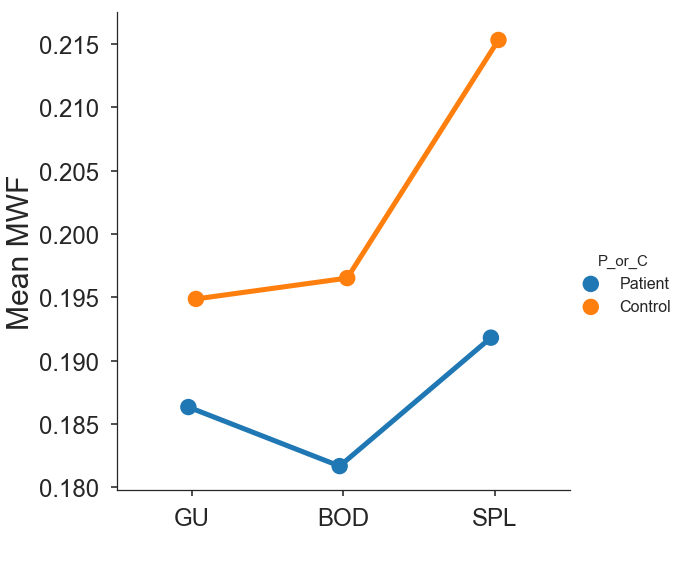

In [486]:
# ISMRM plots 
def sns_ISMRMplot(df, qmri, dat_y, dat_x, dat_hue, plot_type):
    
    data=df[(df['Metric'] == '{0}'.format(qmri))]
    
    sns.set_context("poster")

    g = sns.factorplot(kind='{0}'.format(plot_type),
                       y='{0}'.format(dat_y),
                       x='{0}'.format(dat_x),
                       hue='{0}'.format(dat_hue),
                       data=data,
                       dodge=True,
                       size=8,
#                        aspect=1,
                       ci=None
                      )
    # Modify plot characteristic
    (g
     .set_xlabels(" ", fontsize=30)
     .set_ylabels(r'Mean MWF', fontsize=30)
     .set_xticklabels(fontsize=24)
     .set_yticklabels(fontsize=24)
     .set(
#          ylim=(0.11, 0.26),
#          xlim=(-1,2.5)
         )
    )
    
    
    # Plot style: white, whitegrid
    sns.set_style('ticks')

# sns_plot_basic(df1, 'MWF', 'Value', 'ROI', 'P_or_C', 'box')
sns_ISMRMplot(df = df1,
               qmri = 'MWF',
               dat_y = 'Value',
               dat_x = 'ROI',
               dat_hue = 'P_or_C',
               plot_type = 'point'
              )

'Plot saved as MWF.png'

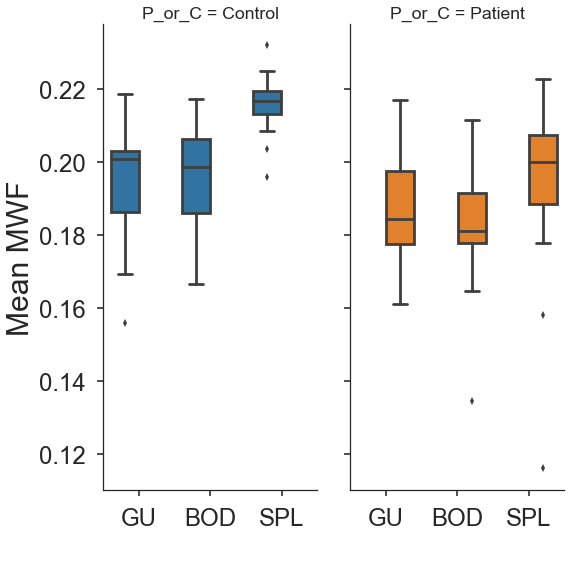

In [476]:
# More complex Seaborn boxplot
def sns_plot_box(df, qmri, dat_y, dat_x, dat_hue, plot_type, save_plot=False):
    
    data=df[(df['Metric'] == '{0}'.format(qmri))]  # Grab only the metric data we want to plot
    
    sns.set_context("poster")
    
    g = sns.factorplot(kind='{0}'.format(plot_type),
                       y='{0}'.format(dat_y),
                       x='{0}'.format(dat_x),
                       hue='{0}'.format(dat_hue),
                       col='{0}'.format(dat_hue),
                       dodge=True,  
#                        palette='colorblind',  # deep, muted, pastel, dark, bright, colorblind
                       size=8,
                       aspect=0.5,  # Width = Size * Aspect
                       ci='sd',
                       hue_order=['Control', 'Patient'],  # Order that the categorical data is plotted in
                       col_order=['Control', 'Patient'],
                       legend=False,  # Whether or not a legend is drawn
                       legend_out=False,  # Legend outside of data
                       data=data
                      )

    # Modify plot characteristic
    (g
     .despine(  # lines around plot
         left=False,
         right=True,
         top=True,
         bottom=False
             )
     .set(
#          ylim=(0.11, 0.26),
#          xlim=(-1,2.5)
         )
     .set_xlabels(" ", fontsize=30)
     .set_ylabels(r'Mean MWF', fontsize=30)
     .set_xticklabels(fontsize=24)
     .set_yticklabels(fontsize=24)
    )
    
    # Plot style: white, whitegrid
    sns.set_style('ticks')
    
    # Sets up plot and legend scaling, properties
#     plt.subplots_adjust(top=1)
    # Set up legend properly
#     (plt
#      .legend(
#          loc='upper left',
# #          bbox_to_anchor = (0, 5),  # force location
#          frameon=True,
#          title=False,
#          fontsize=24,
#          borderpad=1
#             )
#      .get_frame()
#      .set_linewidth(1.5)
#     )
    
    if save_plot != False :
        plt.savefig('{0}.png'.format(save_plot))
        return 'Plot saved as {0}.png'.format(save_plot)
        


sns_plot_box(
    df = df1,
    qmri = 'MWF',
    dat_y = 'Value',
    dat_x = 'ROI',
    dat_hue = 'P_or_C',
    plot_type = 'box',
    save_plot = 'MWF'
            )

'Plot saved as T_m.png'

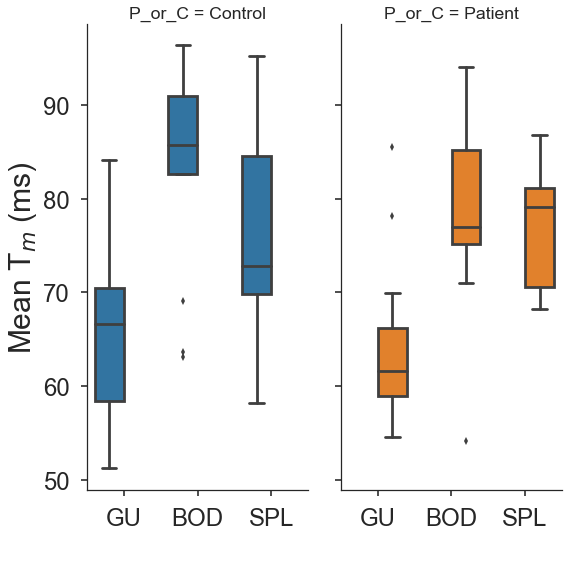

In [477]:
# More complex Seaborn boxplot
def sns_plot_box(df, qmri, dat_y, dat_x, dat_hue, plot_type, save_plot=False):
    
    data=df[(df['Metric'] == '{0}'.format(qmri))]  # Grab only the metric data we want to plot
    
    sns.set_context("poster")
    
    g = sns.factorplot(kind='{0}'.format(plot_type),
                       y='{0}'.format(dat_y),
                       x='{0}'.format(dat_x),
                       hue='{0}'.format(dat_hue),
                       dodge=True,
                       col='{0}'.format(dat_hue),
#                        palette='colorblind',  # deep, muted, pastel, dark, bright, colorblind
                       size=8,
                       aspect=0.5,  # Width = Size * Aspect
                       ci='sd',
                       hue_order=['Control', 'Patient'],  # Order that the categorical data is plotted in
                       col_order=['Control', 'Patient'],
                       legend=False,  # Whether or not a legend is drawn
                       legend_out=False,  # Legend outside of data
                       data=data
                      )

    # Modify plot characteristic
    (g
     .despine(  # lines around plot
         left=False,
         right=True,
         top=True,
         bottom=False
             )
     .set(
#          ylim=(48, 110),
#          xlim=(-1,2.5)
         )
     .set_xlabels(" ", fontsize=30)
     .set_ylabels(r'Mean T$_m$ (ms)', fontsize=30)
     .set_xticklabels(fontsize=24)
     .set_yticklabels(fontsize=24)
    )
    
    # Plot style: white, whitegrid
    sns.set_style('ticks')
    
    # Sets up plot and legend scaling, properties
#     plt.subplots_adjust(top=1)
    # Set up legend properly
#     (plt
#      .legend(
#          loc='upper left',
# #          bbox_to_anchor = (0, 5),  # force location
#          frameon=True,
#          title=False,
#          fontsize=24,
#          borderpad=1
#             )
#      .get_frame()
#      .set_linewidth(1.5)
#     )
    
    if save_plot != False :
        plt.savefig('{0}.png'.format(save_plot))
        return 'Plot saved as {0}.png'.format(save_plot)
        


sns_plot_box(
    df = df1,
    qmri = 'RT',
    dat_y = 'Value',
    dat_x = 'ROI',
    dat_hue = 'P_or_C',
    plot_type = 'box',
    save_plot = 'T_m'
            )

'Plot saved as singleT1.png'

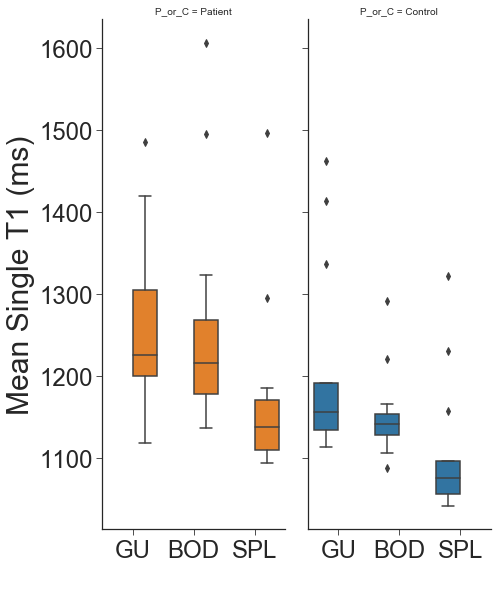

In [447]:
# More complex Seaborn boxplot
def sns_plot_box(df, qmri, dat_y, dat_x, dat_hue, plot_type, save_plot=False):
    
    data=df[(df['Metric'] == '{0}'.format(qmri))]  # Grab only the metric data we want to plot
    
    data=data[(data['Value'] <= 2000)]  # Exclude outlier
    
    g = sns.factorplot(kind='{0}'.format(plot_type),
                       y='{0}'.format(dat_y),
                       x='{0}'.format(dat_x),
                       hue='{0}'.format(dat_hue),
                       dodge=True,
                       col='{0}'.format(dat_hue),
#                        palette='colorblind',  # deep, muted, pastel, dark, bright, colorblind
                       size=8,
                       aspect=0.4,  # Width = Size * Aspect
                       ci='sd',
                       hue_order=['Control', 'Patient'],  # Order that the categorical data is plotted in
                       legend=False,  # Whether or not a legend is drawn
                       legend_out=False,  # Legend outside of data
                       data=data
                      )

    # Modify plot characteristic
    (g
     .despine(  # lines around plot
         left=False,
         right=True,
         top=True,
         bottom=False
             )
     .set(
#          ylim=(None, 1700),
#          xlim=(-1,2.5)
         )
     .set_xlabels(" ", fontsize=30)
     .set_ylabels(r'Mean Single T1 (ms)', fontsize=30)
     .set_xticklabels(fontsize=24)
     .set_yticklabels(fontsize=24)
    )
    
    # Plot style: white, whitegrid
    sns.set_style('ticks')
    
#     Sets up plot and legend scaling, properties
#     plt.subplots_adjust(top=1)
#     Set up legend properly
#     (plt
#      .legend(
#          loc='upper left',
# #          bbox_to_anchor = (0, 5),  # force location
#          frameon=True,
#          title=False,
#          fontsize=24,
#          borderpad=1
#             )
#      .get_frame()
#      .set_linewidth(1.5)
#     )
    
    if save_plot != False :
        plt.savefig('{0}.png'.format(save_plot))
        return 'Plot saved as {0}.png'.format(save_plot)
    
    plt.show(g)
        


sns_plot_box(
    df = df1,
    qmri = 'singleT1',
    dat_y = 'Value',
    dat_x = 'ROI',
    dat_hue = 'P_or_C',
    plot_type = 'box',
    save_plot = 'singleT1'
            )